# Data Analysis

Ideas for anaysis:
- Boxplots for rentprices per city
- Bar charts for rent prices
- (Comparison of baseRent/totalRent/service)
- Heatmap germany with the citys and the rentprices
- ...
- ...
- 
- (Setting base values for the input)
- Funktions for input

- 

### 1. Reading in the Data 

In [2]:
#Initialising the needed libaries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 



In [3]:
#Setting the option that all columns are shown.
pd.set_option('display.max_columns', 100)

In [4]:
#Data from the Main-Dataset
Uni4U_Data = pd.read_csv(r"data/Uni4U_final.csv")

In [5]:
#Data with just raw the University information
uni_only_adjusteddata = pd.read_excel(r"data\Adjusted_University_Data.xlsx")   

In [6]:
#Data with just raw Appartment information
appartments_only_adjusteddata = pd.read_excel(r"data\Adjusted_Appartment_Data.xlsx")

In [7]:
#Data with only the raw Population information
population_only_adjusteddata=pd.read_excel(r"data\Adjusted_Population_Data.xlsx")

We add the raw data from each file in case somebody wants to compare or take a look at something. We will not use it or take into account.

In [8]:
#Data with only the raw Population information
population_only_rawdata=pd.read_csv(r"data/Deutschland_Cities.csv")
#population_data=pd.read_csv(r"\Users\jaho3\Downloads\TechLabs\TechLabs\Deutschland_Cities.csv")

In [9]:
#Data with just raw Appartment information
#appartments = pd.read_csv(r"\Users\jaho3\Downloads\archive (3)\immo_data.csv", usecols = ['regio1','serviceCharge','balcony','telekomUploadSpeed','totalRent', "yearConstructed", "hasKitchen","cellar", "baseRent","livingSpace","petsAllowed", "lift","noRooms", "garden", "regio2", "regio3" ])
appartments_only_rawdata = pd.read_csv(r"data/immo_data.csv")

In [10]:
#Data with just raw the University information
#data = pd.read_csv(r"\Users\jaho3\OneDrive\Documents\group-3\archive\cwurData.csv")#, usecols = ['world_rank',"institution","country", "national_rank", "quality_of_education", "quality_of_faculty", "year"])   
uni_only_rawdata = pd.read_csv(r"data\cwurData.csv")   

##### 1.1. Input-Functions

In [11]:
#This function will ask for a city name. If the city name does not exists then there will be an error message.
def input_city_adjusted():
    city=input("Please enter a city name")
    city=str(city)
    

    if city in Uni4U_Data["city"].unique():
        return city
    elif city in appartments_only_adjusteddata["regio2"].unique():
        return city
    elif city in population_only_adjusteddata["city"].unique():
        return city
    elif city in uni_only_adjusteddata["city"].unique():
        return city

    else:
        print("Oh no! Looks like there was a Problem. Please try again and make sure you wirte the city correct")
    

In [12]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_uni4u_column_adjusted():
    ux=input("Please enter a column name from the Uni4U Dataset.")
    
    

    if ux in Uni4U_Data.columns:
        return ux

    else:
        print("Oh no! Looks like there was a Problem. Please try again and make sure you wirte the column name correct and you use a column from the Uni4U Dataset.")

In [13]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_appartment_column_adjusted():
    ax=input("Please enter a column name from the appartments_only_adjusteddata Dataset.")
    
    if ax in appartments_only_adjusteddata.columns:
        return ax

    else:
        print("Oh no! Looks like there was a Problem. Please try again and make sure you wirte the column name correct and you use a column from the appartments_only_adjusteddata Dataset.")

In [14]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_population_column_adjusted():
    px=input("Please enter a column name from the population_only_adjusteddata Dataset.")
    
    if px in population_only_adjusteddata.columns:
        return px

    else:
        print("Oh no! Looks like there was a Problem. Please try again and make sure you wirte the column name correct and you use a column from the population_only_adjusteddata Dataset.")

In [15]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_uniad_column_adjusted():
    uax=input("Please enter a column name from the uni_only_adjusteddata Dataset.")
    
    if uax in uni_only_adjusteddata.columns:
        return uax

    else:
        print("Oh no! Looks like there was a Problem. Please try again and make sure you wirte the column name correct and you use a column from the uni_only_adjusteddata Dataset.")

### 2. Analysing the Data

In [19]:
Uni4U_Data.columns

Index(['Unnamed: 0', 'old_index', 'world_rank', 'institution', 'country',
       'national_rank', 'quality_of_education', 'quality_of_faculty', 'year',
       'city', 'totalRent_mean', 'totalRent_median', 'serviceCharge_mean',
       'serviceCharge_median', 'baseRent_mean', 'baseRent_median',
       'livingSpace_mean', 'livingSpace_median', 'noRooms_mean',
       'noRooms_median', 'hasKitchen_percentage', 'cellar_percentage',
       'lift_percantage', 'lift_y', 'telekomUploadSpeed_mean',
       'telekomUploadSpeed_median', 'yearConstructed_mean',
       'yearConstructed_median', 'population_per_city'],
      dtype='object')

##### 2.x. Filtering

Here we filter the Data for specific questions

Question: Which University has the best quality of education while at the same time is located in a city where the total rent median is not more than 700€?:

<details>    
<summary>
    <font size="2" color="red"><b>Answer (click to expand)</b></font>
</summary>
<p>
   University of Göttingen
</p>
</details>  

In [54]:
#Which University has the best quality of education while at the same time is located in a city where the total rent is not more than 700€?
filt=(Uni4U_Data["totalRent_median"]<701)
Uni4U_Data[filt].sort_values(by="quality_of_education", ascending=True).head() 

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,lift_y,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,population_per_city
14,14,368,169,University of Göttingen,Germany,10,39,172,2014,Göttingen,802.208380,696.0,154.809463,144.0,641.816525,556.5,68.889830,65.41,2.704255,2.0,0.470922,0.453901,0.154610,0.154610,32.177134,40.0,1973.485887,1978.0,119801.0
70,70,1376,177,University of Göttingen,Germany,11,43,176,2015,Göttingen,802.208380,696.0,154.809463,144.0,641.816525,556.5,68.889830,65.41,2.704255,2.0,0.470922,0.453901,0.154610,0.154610,32.177134,40.0,1973.485887,1978.0,119801.0
21,21,431,232,University of Kiel,Germany,17,180,192,2014,Kiel,762.546050,682.0,119.854339,100.0,614.121678,520.0,66.652945,63.00,2.446952,2.0,0.642694,0.681507,0.237443,0.237443,26.147330,40.0,1933.686122,1959.0,247548.0
76,76,1414,215,University of Kiel,Germany,17,193,198,2015,Kiel,762.546050,682.0,119.854339,100.0,614.121678,520.0,66.652945,63.00,2.446952,2.0,0.642694,0.681507,0.237443,0.237443,26.147330,40.0,1933.686122,1959.0,247548.0
29,29,498,299,Leipzig University,Germany,25,308,201,2014,Leipzig,743.167133,588.0,148.101223,131.0,575.334295,433.0,72.472193,64.40,2.586845,2.0,0.241147,0.620324,0.311160,0.311160,33.154892,40.0,1951.521097,1964.0,542529.0


Question: Which University has the best rank from 2015?:

<details>    
<summary>
    <font size="2" color="red"><b>Answer (click to expand)</b></font>
</summary>
<p>
    Ruprecht Karl University of Heidelberg
</p>
</details>   

In [55]:
filt=(Uni4U_Data["year"]==2015)
Uni4U_Data[filt].sort_values(by="national_rank", ascending=True).head()

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,lift_y,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,population_per_city
60,60,1275,76,Ruprecht Karl University of Heidelberg,Germany,1,38,51,2015,Heidelberg,1348.422541,1290.0,207.847157,200.00,1148.408448,1100.0,84.978429,85.0,2.825670,3.0,0.593870,0.653257,0.450192,0.450192,4.189318,2.4,1978.135338,1998.0,160355.0
61,61,1278,79,Ludwig Maximilian University of Munich,Germany,2,42,92,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
62,62,1300,101,Technical University of Munich,Germany,3,37,177,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
63,63,1346,147,Free University of Berlin,Germany,4,76,128,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.483375,32.195063,40.0,1965.192072,1978.0,3644826.0
64,64,1352,153,Humboldt University of Berlin,Germany,5,291,108,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.483375,32.195063,40.0,1965.192072,1978.0,3644826.0


Question: Which University ranked in 2015 is located in Hamburg, München or Berlin and has the highest percentage on appartments with a lift?:

<details>    
<summary>
    <font size="2" color="red"><b>Answer (click to expand)</b></font>
</summary>
<p>
    Ludwig Maximilian University of Munich
</p>
</details>   

In [65]:
filt=(Uni4U_Data["year"]==2015) & (Uni4U_Data["city"]=="München") | (Uni4U_Data["year"]==2015) &(Uni4U_Data["city"]=="Hamburg") | (Uni4U_Data["year"]==2015) &(Uni4U_Data["city"]=="Berlin")  
Uni4U_Data[filt].sort_values(by="lift_percantage", ascending=False)

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,lift_y,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,population_per_city
61,61,1278,79,Ludwig Maximilian University of Munich,Germany,2,42,92,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
62,62,1300,101,Technical University of Munich,Germany,3,37,177,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
63,63,1346,147,Free University of Berlin,Germany,4,76,128,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.483375,32.195063,40.0,1965.192072,1978.0,3644826.0
64,64,1352,153,Humboldt University of Berlin,Germany,5,291,108,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.483375,32.195063,40.0,1965.192072,1978.0,3644826.0
89,89,1544,345,Technical University of Berlin,Germany,30,85,218,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.483375,32.195063,40.0,1965.192072,1978.0,3644826.0
68,68,1361,162,University of Hamburg,Germany,9,314,135,2015,Hamburg,1411.919105,1233.0,204.971001,180.00,1185.550048,1014.0,83.582416,76.0,2.709338,3.0,0.787709,0.581272,0.395318,0.395318,34.152286,40.0,1980.548754,1993.0,1841179.0


##### 2.x. Histograms

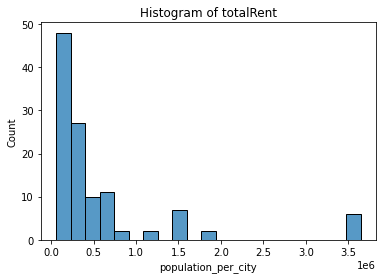

In [21]:
sns.histplot(Uni4U_Data["population_per_city"], kde = False).set_title("Histogram of totalRent")
plt.show()

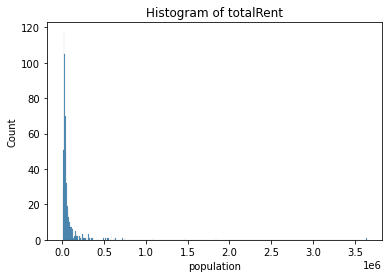

In [22]:
sns.histplot(population_only_adjusteddata["population"], kde = False).set_title("Histogram of totalRent")
plt.show()

##### 2.x. Boxplots

In [17]:
Uni4U_Data

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,lift_y,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,population_per_city
0,0,81,82,Ruprecht Karl University of Heidelberg,Germany,1,87,52,2012,Heidelberg,1348.422541,1290.0,207.847157,200.0,1148.408448,1100.000,84.978429,85.000,2.825670,3.0,0.593870,0.653257,0.450192,0.450192,4.189318,2.4,1978.135338,1998.0,160355.0
1,1,82,83,Ludwig Maximilian University of Munich,Germany,2,90,90,2012,München,1904.166454,1650.0,193.623375,180.0,1712.898009,1490.000,92.774910,75.000,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
2,2,89,90,Technical University of Munich,Germany,3,52,101,2012,München,1904.166454,1650.0,193.623375,180.0,1712.898009,1490.000,92.774910,75.000,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
3,3,166,67,Ludwig Maximilian University of Munich,Germany,1,62,92,2013,München,1904.166454,1650.0,193.623375,180.0,1712.898009,1490.000,92.774910,75.000,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
4,4,178,79,Ruprecht Karl University of Heidelberg,Germany,2,73,55,2013,Heidelberg,1348.422541,1290.0,207.847157,200.0,1148.408448,1100.000,84.978429,85.000,2.825670,3.0,0.593870,0.653257,0.450192,0.450192,4.189318,2.4,1978.135338,1998.0,160355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,1992,793,University of Hohenheim,Germany,51,367,218,2015,Stuttgart,1487.458776,1400.0,153.410158,139.0,1373.798809,1297.050,77.144122,73.295,2.611298,2.5,0.689038,0.572707,0.262864,0.262864,27.828768,40.0,1969.930676,1972.0,634830.0
111,111,2000,801,University of Oldenburg,Germany,52,367,218,2015,Oldenburg,759.706757,790.0,138.561321,125.0,595.319174,600.000,83.917431,82.000,2.779817,3.0,0.495413,0.201835,0.146789,0.146789,13.888636,2.4,1989.736842,1998.0,168210.0
112,112,2056,857,University of Siegen,Germany,53,367,218,2015,Siegen Wittgenstein,702.158013,665.0,143.905220,125.0,534.212942,480.000,75.043421,73.000,2.780826,3.0,0.309091,0.690909,0.247934,0.247934,32.119640,40.0,1970.882474,1973.0,102836.0
113,113,2075,876,University of Osnabrück,Germany,54,367,218,2015,Osnabrück,796.577535,760.0,139.458028,127.0,646.177013,590.000,76.663201,72.260,2.710526,3.0,0.395448,0.651494,0.231863,0.231863,15.257483,2.4,1977.729965,1978.0,164748.0


In [18]:
#Here you can get a Boxplot for the wanted city and the wanted column:
searched_city=appartments_only_adjusteddata[appartments_only_adjusteddata["regio2"]== input("Please type in the city name.")]
sns.boxplot(x=searched_city[input("Please type in the column name.")])
plt.savefig("Pictures/boxplot.jpg")


KeyError: 'gj'

##### 2.x. Rankings

In [ ]:
#Sorting the Data by a wished column:
Uni4U_Data.sort_values(by=input("Please type in the column by which you want to sort the Data"), ascending=True) 

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,lift_y,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,population_per_city
0,0,81,82,Ruprecht Karl University of Heidelberg,Germany,1,87,52,2012,Heidelberg,1348.422541,1290.0,207.847157,200.0,1148.408448,1100.000,84.978429,85.00,2.825670,3.0,0.593870,0.653257,0.450192,0.450192,4.189318,2.4,1978.135338,1998.0,160355.0
5,5,281,82,Ludwig Maximilian University of Munich,Germany,1,43,91,2014,München,1904.166454,1650.0,193.623375,180.0,1712.898009,1490.000,92.774910,75.00,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
3,3,166,67,Ludwig Maximilian University of Munich,Germany,1,62,92,2013,München,1904.166454,1650.0,193.623375,180.0,1712.898009,1490.000,92.774910,75.00,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
60,60,1275,76,Ruprecht Karl University of Heidelberg,Germany,1,38,51,2015,Heidelberg,1348.422541,1290.0,207.847157,200.0,1148.408448,1100.000,84.978429,85.00,2.825670,3.0,0.593870,0.653257,0.450192,0.450192,4.189318,2.4,1978.135338,1998.0,160355.0
4,4,178,79,Ruprecht Karl University of Heidelberg,Germany,2,73,55,2013,Heidelberg,1348.422541,1290.0,207.847157,200.0,1148.408448,1100.000,84.978429,85.00,2.825670,3.0,0.593870,0.653257,0.450192,0.450192,4.189318,2.4,1978.135338,1998.0,160355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,1108,909,University of Osnabrück,Germany,53,355,210,2014,Osnabrück,796.577535,760.0,139.458028,127.0,646.177013,590.000,76.663201,72.26,2.710526,3.0,0.395448,0.651494,0.231863,0.231863,15.257483,2.4,1977.729965,1978.0,164748.0
58,58,1119,920,Chemnitz University of Technology,Germany,54,355,210,2014,Chemnitz,458.504498,420.0,124.986924,120.0,325.567874,295.000,62.503412,59.03,2.496619,2.0,0.231809,0.765249,0.177495,0.177495,30.605248,40.0,1935.814323,1920.0,245403.0
113,113,2075,876,University of Osnabrück,Germany,54,367,218,2015,Osnabrück,796.577535,760.0,139.458028,127.0,646.177013,590.000,76.663201,72.26,2.710526,3.0,0.395448,0.651494,0.231863,0.231863,15.257483,2.4,1977.729965,1978.0,164748.0
59,59,1165,966,University of Oldenburg,Germany,55,355,210,2014,Oldenburg,759.706757,790.0,138.561321,125.0,595.319174,600.000,83.917431,82.00,2.779817,3.0,0.495413,0.201835,0.146789,0.146789,13.888636,2.4,1989.736842,1998.0,168210.0


##### 2.x. Correlation

In [ ]:
#Getting a visual correlation and the correlation coefficent for two wished columns:

#First type in the wished columns:
x=input("Please type in the name of the first column (dependent variable)")
y=input("Please type in the name of the second column (independent variable)")

#Second the needed code is executed:
plt.figure(figsize=(20,20))
plt.subplot(2,2,2)

    #The needed Variables are set as dependent and independent:
plt.scatter(x = Uni4U_Data[x], y = Uni4U_Data[y])

    #The Titel of the visual
plt.title("Joint Distribution of "+x+  " and "+y )
plt.show()
print(Uni4U_Data[[x,y]].dropna().corr())

<IPython.core.display.Javascript object>

                  national_rank  totalRent_median
national_rank          1.000000         -0.585647
totalRent_median      -0.585647          1.000000
